In [ ]:
# Part 1: Data Exploration and Visualization 
# 1. Load the HW2.csv (can be found under Files on Canvas).

import pandas as pd

# Load the CSV file
file_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 3001\HW2\HW2.csv"
df = pd.read_csv(file_path)

# Show the first few rows to confirm it loaded correctly
print("Data Preview:")
print(df.head())

Data Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Part 1: Data Exploration and Visualization
# 2. Calculate statistics: mean, median, std
stats = pd.DataFrame({
    "Mean": df.mean(numeric_only=True),
    "Median": df.median(numeric_only=True),
    "Std Dev": df.std(numeric_only=True)
})

# Print results
print("Basic Statistics for Each Variable:")
print(stats)

Basic Statistics for Each Variable:
                   Mean     Median       Std Dev
price      4.766729e+06  4340000.0  1.870440e+06
area       5.150541e+03     4600.0  2.170141e+03
bedrooms   2.965138e+00        3.0  7.380639e-01
bathrooms  1.286239e+00        1.0  5.024696e-01
stories    1.805505e+00        2.0  8.674925e-01
parking    6.935780e-01        0.0  8.615858e-01


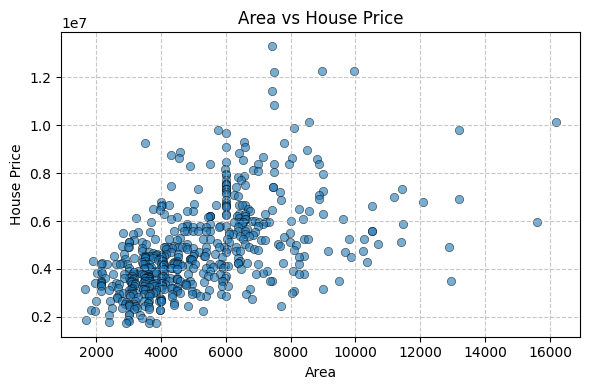

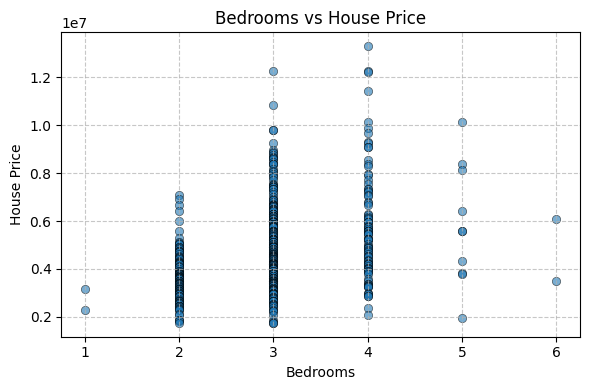

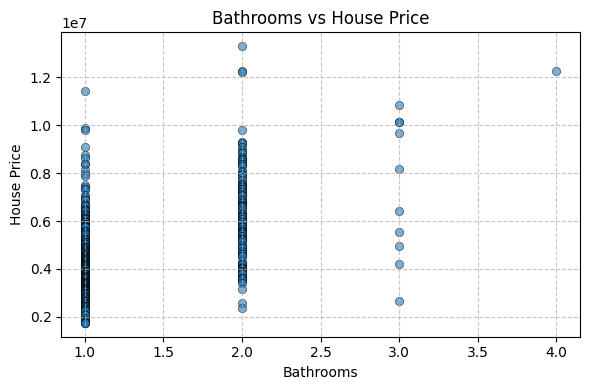

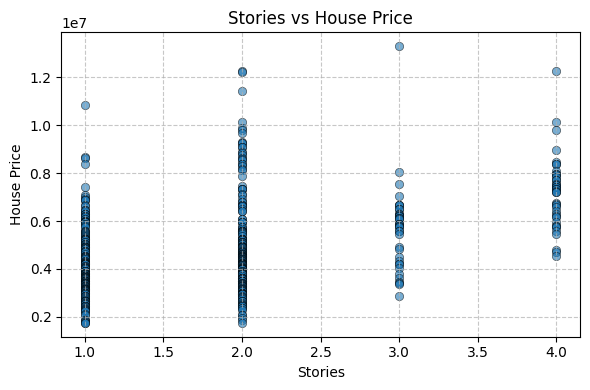

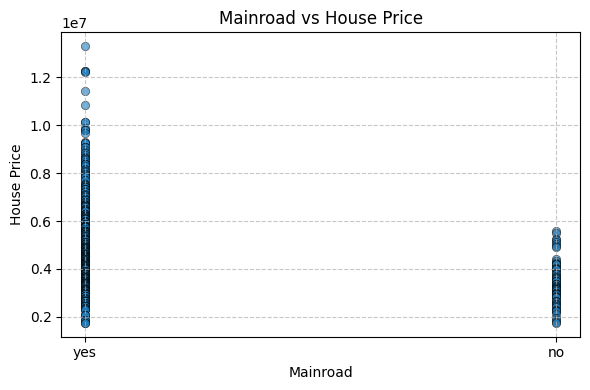

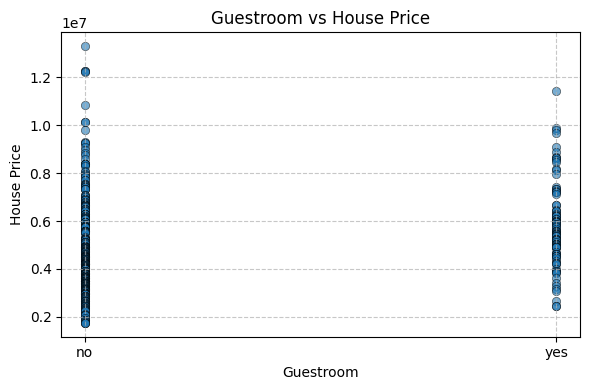

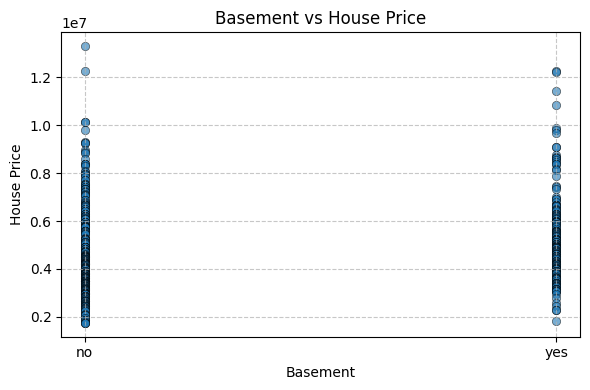

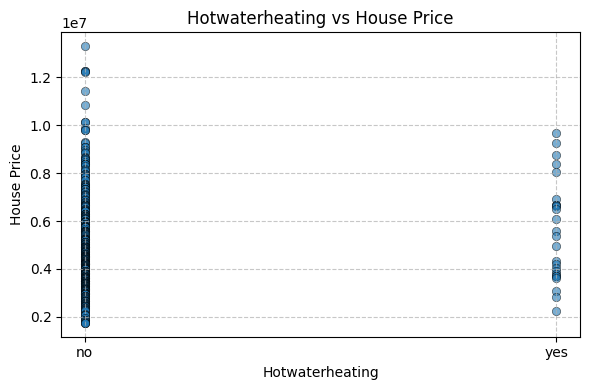

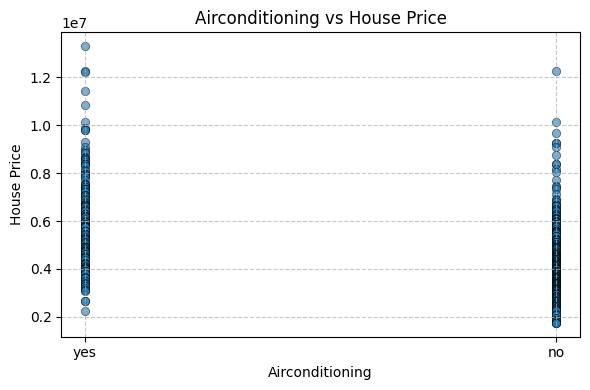

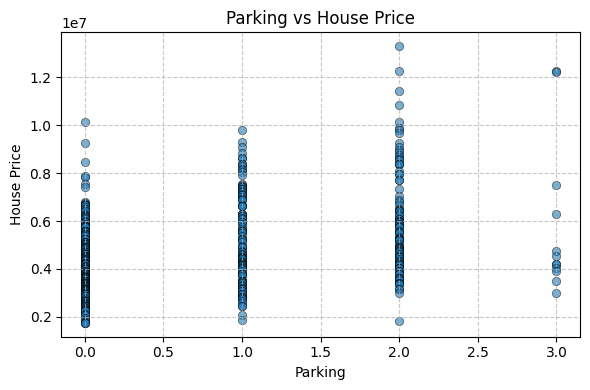

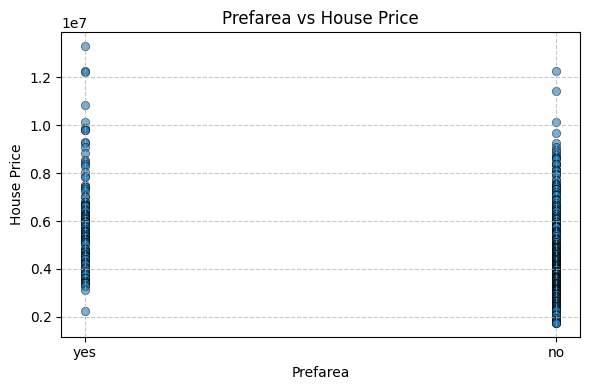

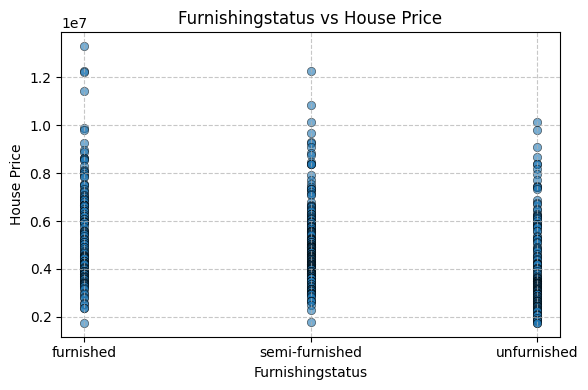

In [ ]:
# Part 1: Data Exploration and Visualization
# 3. Create scatter plots for each independent variable against the house price.


import matplotlib.pyplot as plt

target = "price"  # your dependent variable


# Scatter plots
for col in df.columns:
    if col != target:  
        plt.figure(figsize=(6, 4))
        plt.scatter(df[col], df[target], alpha=0.6, edgecolor="k", linewidth=0.5)
        plt.xlabel(col.capitalize())   # Capitalize x-axis label
        plt.ylabel("House Price")      # Nice label for y-axis
        plt.title(f"{col.capitalize()} vs House Price")  # Title with capitalization
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()


Part 1: Data Exploration and Visualization

4. Write a brief paragraph interpreting these plots.

**Write a brief paragraph intepreting these plots**

The scatter plots illustrate the relationships between different features and house prices. In general, larger 
 square footage, more stories, and additional parking spaces 
 are associated with higher prices, showing clear positive 
 correlations. Bedrooms and bathrooms, however, display weaker 
 patterns, with homes of different room counts often selling
  for similar prices. This suggests that size and amenities 
 may play a bigger role in determining value than the raw 
 number of rooms. Considerable variability also appears at
  higher price levels, indicating that multiple factors 
 influence outcomes beyond the features plotted. Overall, 
 these visualizations highlight area, stories, and parking as
  the strongest predictors of higher property values, while
  further statistical analysis would be needed to measure 
 these effects precisely.

In [17]:
# Part 2: Correlation Analysis
# 1. Calculate the Pearson correlation coefficient between house price and each independent variable.

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Calculate Pearson correlation with price
correlations = numeric_df.corr(method="pearson")["price"].drop("price")
# pearson correlation ranges from -1 to 1 and measures linear correlation
# Values close to 1 indicate strong positive correlation,
# values close to -1 indicate strong negative correlation,  
# and values around 0 indicate no linear correlation.


print("Pearson Correlation with House Price:")
print(correlations)




Pearson Correlation with House Price:
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64


Part 2: Correlation Analysis

**2.  Interpret the correlation coefficients. Which variable has the strongest correlation with price? 
What does this mean?**

The correlation coefficients measure the strength and direction of the linear relationship
between each independent variable and house price.
All the coefficients are positive, indicating that as each variable increases,
house price tends to increase as well. The variable with the strongest correlation
with price is "area" (square footage), with a coefficient of approximately 0.54
This indicates that larger homes and those iwth more bathrooms are more likely to command
higher prices compared to other features. Bedrooms, storeis, and parking also show moderate 
positive correlations, but their relationships are weaker, suggesting they contribute less directly 
to price variation. Overal, area is the most important linear predictor of house price in this dataset, 
though none of the correlations are extremely strong, meaning multiple factors still 
play a role in determing property value. 

* *Note: categorical variables (such as "yes"/"no" features) are not included in the numeric statistics or scatterplots here, since they cannot be directly plotted as numbers. These variables will be encoded into numeric form later for regression analysis.*


**Part 3: Linear Regression - 1 IV**

1. Choose the independent variable with the strongest correlation to price.

    **area** has the strongest correlation to price (0.54) 
 

Simple Linear Regression Equation: price = 2387308.48 + 461.97 * area


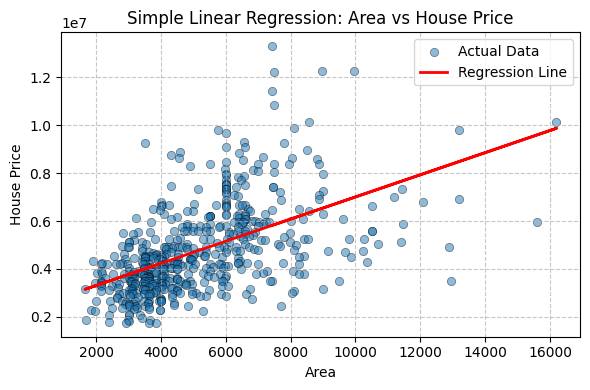

In [ ]:
# Part 3: Linear Regression – 1 IV
# 2. Implement simple linear regression using the least squares method.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Independent (X) and dependent (y) variables
X = df[["area"]]   # strongest correlated variable
y = df["price"]

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# least squares regression equation
# y = mx + b
# y = price (dependent variable)
# m = slope (coefficient)
# x = area (independent variable)
# b = intercept (constant term)


print(f"Simple Linear Regression Equation: price = {intercept:.2f} + {slope:.2f} * area")

# Predictions
y_pred = model.predict(X)

# Part 3: Linear Regression
# 3. Plot the regression line along with the scatter plot of your chosen variable vs. price.

# Plot the regression line
plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.5, edgecolor="k", linewidth=0.5, label="Actual Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Area")
plt.ylabel("House Price")
plt.title("Simple Linear Regression: Area vs House Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Part 3: Linear Regression – 1 IV
# 4. Calculate the R-squared value for your model.

# Calculate R-squared
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

# The R² value of 0.2873 indicates that area explains 
# approximately 28.7% of the variation in house prices. 
# While area is an important predictor, other features 
# must also contribute significantly to house price 
# determination.


R-squared: 0.2873


Part 3: Linear Regression – 1 IV
***5. Interpret the meaning of the slope and intercept in the context of house prices.***

The regression equation is:

price = 2,387,308.48 + 461.97 × area

- **Slope (461.97):** This means that for every additional square foot of area, the predicted house price increases by about **$462**, holding all else constant. In other words, larger homes are expected to cost more, with price rising steadily as area increases.

- **Intercept (2,387,308.48):** This represents the model’s estimated base price of a house when the area is zero. While a house cannot realistically have zero square footage, the intercept provides the starting value of the regression line and shifts it upward to better fit the data.

**In summary, the slope shows how house price grows with added space, while the intercept anchors the regression line mathematically even though it has limited real-world meaning.**


In [9]:
# Part 4: Residual Analysis
# 1. Calculate the residuals for your simple linear regression model.

# Residuals = actual - predicted
residuals = y - y_pred

# Display the first 10 residuals
print("First 10 residuals:\n", residuals.head(10))


First 10 residuals:
 0    7.484838e+06
1    5.723396e+06
2    5.261422e+06
3    6.362880e+06
4    5.594838e+06
5    4.997880e+06
6    3.798947e+06
7    2.786982e+05
8    3.740695e+06
9    4.756336e+06
Name: price, dtype: float64


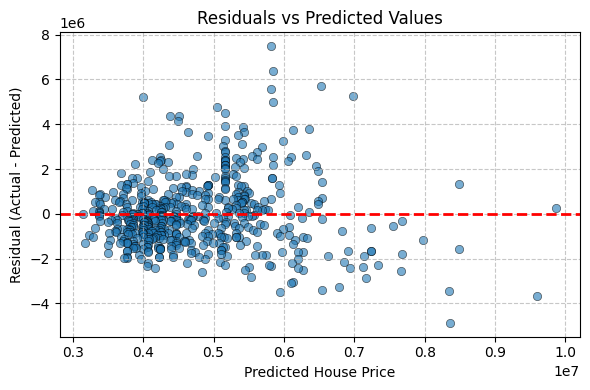

In [10]:
# Part 4: Residual Analysis
# 2. Create visualization of the residuals.

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor="k", linewidth=0.5)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)  # horizontal line at 0
plt.xlabel("Predicted House Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# Part 4: Residual Analysis
3. Interpret this visualization. What does it suggest about your model?

The residual plot shows that residuals are scattered around zero, which is good. However, there is noticeable spread and some outliers, suggesting that area alone does not fully explain house prices. Other factors (such as location, number of bedrooms, bathrooms, etc.) likely play a significant role in predicting house price.

In [14]:
# Part 5: Linear Regression – all IVs
# 1. Perform linear regression using all independent variables.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features (X) and target (y)
X_all = df.drop(columns=["price"])
y = df["price"]

# Identify categorical and numeric columns
categorical_cols = X_all.select_dtypes(include=["object"]).columns
numeric_cols = X_all.select_dtypes(include=["number"]).columns

# Preprocessor: one-hot encode categorical variables, pass through numeric unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# Create pipeline with preprocessing + regression
model_all = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit the model
model_all.fit(X_all, y)

# Get coefficients
feature_names = (list(model_all.named_steps["preprocessor"]
                      .transformers_[0][1].get_feature_names_out(categorical_cols))
                 + list(numeric_cols))

coefficients = pd.DataFrame({
    "Variable": feature_names,
    "Coefficient": model_all.named_steps["regressor"].coef_
})

intercept_all = model_all.named_steps["regressor"].intercept_

print("Intercept:", intercept_all)
print(coefficients)


Intercept: 42771.69391796179
                           Variable    Coefficient
0                      mainroad_yes  421272.588726
1                     guestroom_yes  300525.859636
2                      basement_yes  350106.904136
3               hotwaterheating_yes  855447.145397
4               airconditioning_yes  864958.311318
5                      prefarea_yes  651543.799863
6   furnishingstatus_semi-furnished  -46344.619980
7      furnishingstatus_unfurnished -411234.386157
8                              area     244.139386
9                          bedrooms  114787.560185
10                        bathrooms  987668.107286
11                          stories  450848.002859
12                          parking  277107.101342


In [15]:
# Part 5: Linear Regression – all IVs
# 2. Compare the R-squared value of this model to your 1-IV linear regression model.

# R-squared for the multiple regression
r_squared_all = model_all.score(X_all, y)
print(f"R-squared (all IVs): {r_squared_all:.4f}")


R-squared (all IVs): 0.6818


Part 5: Linear Regression – all IVs

3. Interpret the coefficients of the multiple regression model.

The coefficients show how each variable affects house price while holding others constant. 
Key findings are:

- Houses with features like **air conditioning (~$865K)**, hot water heating **(~$855K)**, or **extra bathrooms (~$988K each)** see large price increases.
- **Area** also matters, with each additional square foot adding about **$244**.
- Other features such as **main road access, guestroom, basement, stories, and parking** add several hundred thousand dollars each.
- **Furnishing status** lowers price relative to fully furnished homes, especially if unfurnished (about **–$411K**).

**In summary, both size and amenities strongly influence price, with bathrooms and air conditioning being among the most impactful predictors.**


In [16]:
# Part 6: Implement k-fold cross-validation (k=5) for your simple linear regression model. 
# Explain how this helps in assessing the model's performance.

from sklearn.model_selection import cross_val_score, KFold

# Independent and dependent variables
X = df[["area"]]   # simple model uses area only
y = df["price"]

# Define the model
model_simple = LinearRegression()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation (R^2 scores)
cv_scores = cross_val_score(model_simple, X, y, cv=kf, scoring="r2")

print("Cross-validation R^2 scores:", cv_scores)
print("Average R^2:", cv_scores.mean())


Cross-validation R^2 scores: [ 0.27287852  0.25974785 -0.05741414  0.33879088  0.31720979]
Average R^2: 0.22624257978867965


K-fold cross-validation provides a more reliable estimate of model performance than a single train/test split. By training and testing the model across 5 different folds, it reduces the risk of overfitting to one specific subset of data. The average R² value from cross-validation reflects how well the simple regression model (area only) generalizes to new, unseen data, giving us a more robust assessment of its predictive power.
